In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial as P

### Differentiation

In [25]:
def backward_diff(f, h, x):
    return (f(x) - f(x-h)) / h

def central_diff(f, h, x):
    return (f(x+h) - f(x-h)) / (2*h)

def forward_diff(f, h, x):
    return (f(x+h) - f(x)) / h

In [26]:
def error_1(f, f_prime, h, x):
    Y_correct = f_prime(x)
    f_error = np.array([])
    b_error = np.array([])
    c_error = np.array([])

    for h_i in h:
        # for different values of h (h_i)
        # calculate the error at the point x for  (i) forward method
        #                                         (ii) backward method
        #                                         (ii) central method
        # the first one is done for you
        f_error_h_i = forward_diff(f, h_i, x) - Y_correct
        f_error = np.append(f_error, f_error_h_i)

        b_error_h_i = forward_diff(f, h_i, x) - Y_correct
        b_error = np.append(b_error, b_error_h_i)

        c_error_h_i = central_diff(f, h_i, x) - Y_correct
        c_error = np.append(c_error, c_error_h_i)

    return f_error, b_error, c_error

### Richardson Extrapolation

In [27]:
def dh(f, h, x):
    return central_diff(f, h, x)

def dh1(f, h, x, n=2):
    return ((n**2)*dh(f, h/n, x) - dh(f, h, x))/((n**2) - 1)

def dh2(f, h, x, n=2):
    return ((n**4)*dh1(f, h/n, x) - dh1(f, h, x))/(n**4 - 1)

def error_2(f, hs, x_i):  #Using the functions we wrote dh() my c_diff  and dh1()
                          #which is my first order c diff, we find the error through appending their diffrences with Y_actual ny f(x)
    '''
    Input:
        f  : np.polynomial.Polynonimial type data.
        hs : np.array type data. list of h.
        x_i: floating point data. single value of x.
    Output:
        return two np.array type data of errors by two methods..
    '''
    f_prime = f.deriv(1)   #first order derivitive f^1(x)
    Y_actual = f_prime(x_i)

    diff_error = []
    diff2_error = []

    for h in hs: #where h is my loop counter iterating through hs
        # for each values of hs calculate the error using both methods
        # and append those values into diff_error and diff2_error list.
        diff_error.append(dh(f, h, x_i) - Y_actual)
        diff2_error.append(dh1(f, h, x_i) - Y_actual)
        
    print(pd.DataFrame({"h": hs, "Diff": diff_error, "Diff2": diff2_error}))
    return diff_error, diff2_error

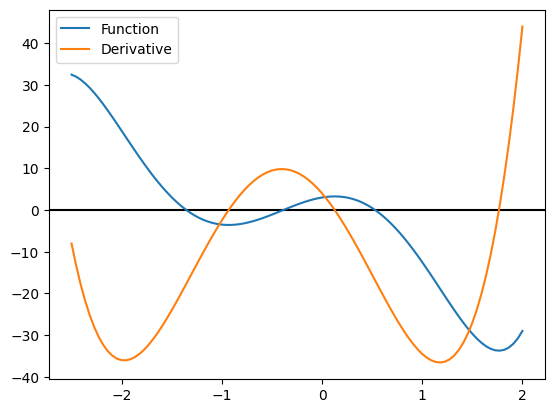

In [28]:
def draw_graph(f, ax, domain=[-10, 10], label=None):
    data = f.linspace(domain=domain)
    ax.plot(data[0], data[1], label=label)

fig, ax = plt.subplots()
ax.axhline(y=0, color='k')

p = Polynomial([3.0, 4.0, -14.0, -10.0, 3.0, 1.5])
p_prime = p.deriv(1)
draw_graph(p, ax, [-2.5, 2.0], 'Function')
draw_graph(p_prime, ax, [-2.5, 2.0], 'Derivative')

ax.legend()

In [24]:
def backward_diff(f, h, x):
    return (f(x) - f(x-h)) / h

def solve(f, x, h, tolerance):
  f_1 = f.deriv(1)
  current_error = np.abs(backward_diff(f,h,x) - f_1(x))
  count = 0
  while (current_error >= tolerance):
    h = h - (h/3)
    current_error = np.abs(backward_diff(f,h,x) - f_1(x))
    count += 1

  return (h, count)

# Driver Code

f = P([10,4,1,-2,1])
x = 3
h = 0.5
tolerance = 0.001925

h, reductions = solve(f, x, h, tolerance)
print(f"h: {h}")
print(f"Total Reductions: {reductions}")

h: 4.4552394047661854e-05
Total Reductions: 23


In [29]:
f = Polynomial([15, 1.5, -2, 3.75, 7, -1, 5])
x = 1
h = 0.4

print(round(dh1(f, h, x, 3), 2))

61.67
